# **Prediction heart disease using the ML**
This notebook is look into various Pyhton-based machine learning and data science libraries is an attempt to build a machine learning model
capable of predicting wheather someone has a heart diease or not based on their modeical attributes.

I am going to take the following approach:
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modeliing
6. Experimentation

## **1. Problem Defination**
In the statement,
> Given clinical params about the patient, can we predict wheather they have heart desease or not.

## **2. Data**
The orifinal data came form kaggle 

## **3. Evaluation**
> If we can reach 95% accuracy at predicting heart disease, we'll pursue the project.

## **Features**
This is where you get info of each feature in  `data`



## Preparing the tools
We are going to use pandas, numpy etc


In [44]:
# Impoting all the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

'''
These are used for EDA (Exploratory data analysis)
'''

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, recall_score

## Load Data

In [45]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration
**The goal is to understand the data and become subject matter expert**
* What question we are trying to solve
* What kind of data 
* What is missing
* Handle outliers 
* Do manipulate the feature

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [48]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

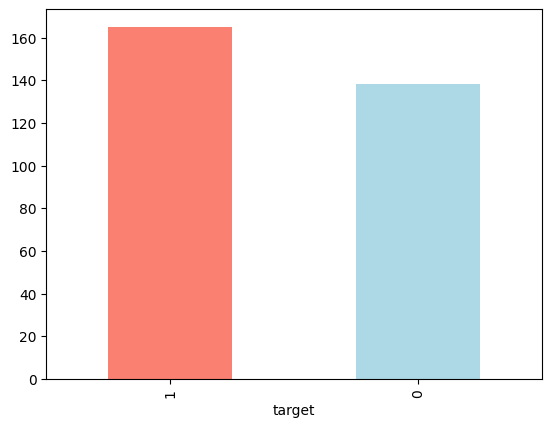

In [49]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


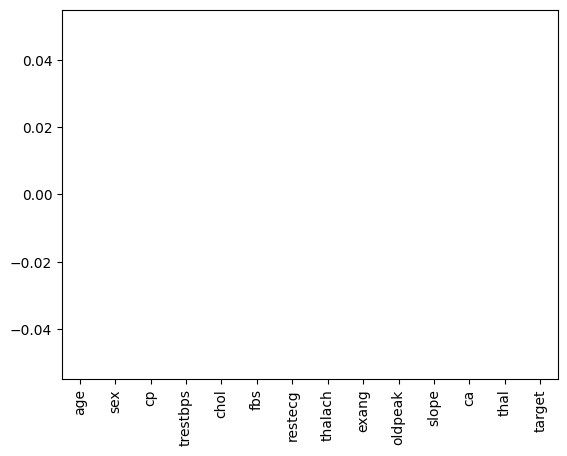

In [51]:
# are there any missing values
df.isna().sum().plot(kind='bar')
print(df.isna().sum())

In [52]:
### Heart disease frequecy according to sex
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

* 1 - male
* 2 - female

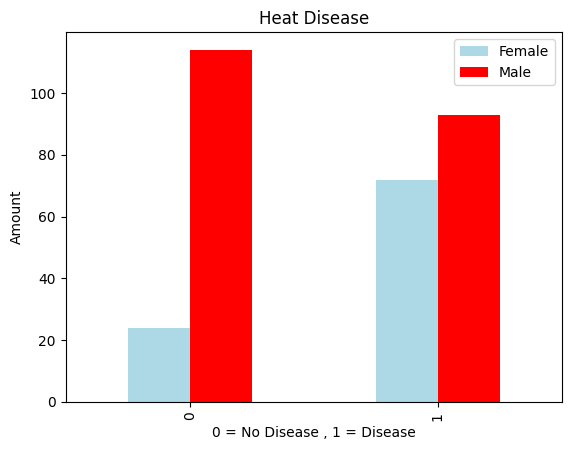

In [53]:
## compre target column with sex column
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['lightblue', 'red'])
plt.title("Heat Disease")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

In [54]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


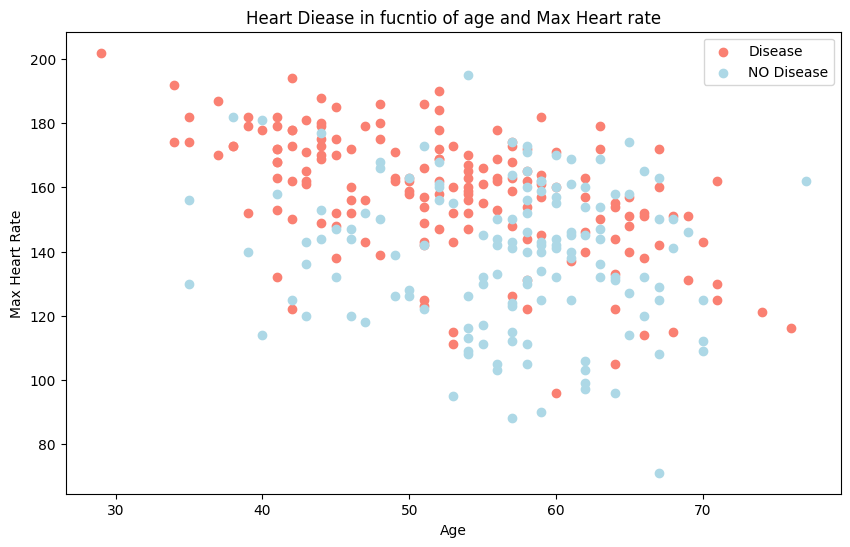

In [55]:
# age vs max heart rate for heart diease
plt.figure(figsize=(10, 6))

#Scatter plot
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c = 'salmon')

#Scatter plot
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = 'lightblue');


# Add some info
plt.title("Heart Diease in fucntio of age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "NO Disease"])

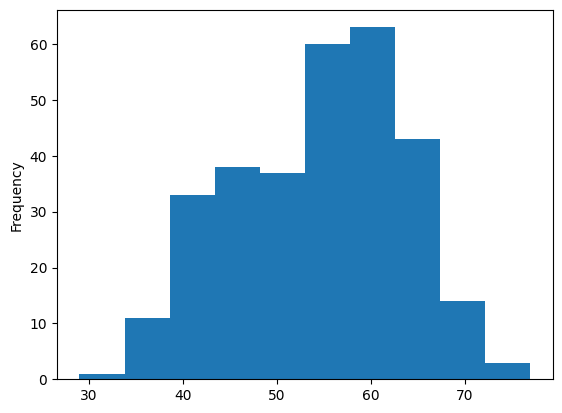

In [56]:
# Check the spread of age in column with hist
df.age.plot(kind='hist');

In [57]:
## Heart Diease Frequency per chesr pain type
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


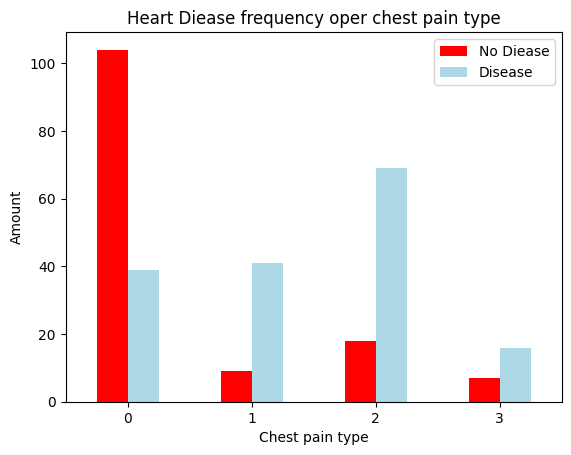

In [58]:
## Make the cross tab visual
pd.crosstab(df.cp,df.target).plot(kind='bar', color = ['red', 'lightblue'])
plt.title("Heart Diease frequency oper chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend((["No Diease", "Disease"]))
plt.xticks(rotation = 0 );

<Axes: >

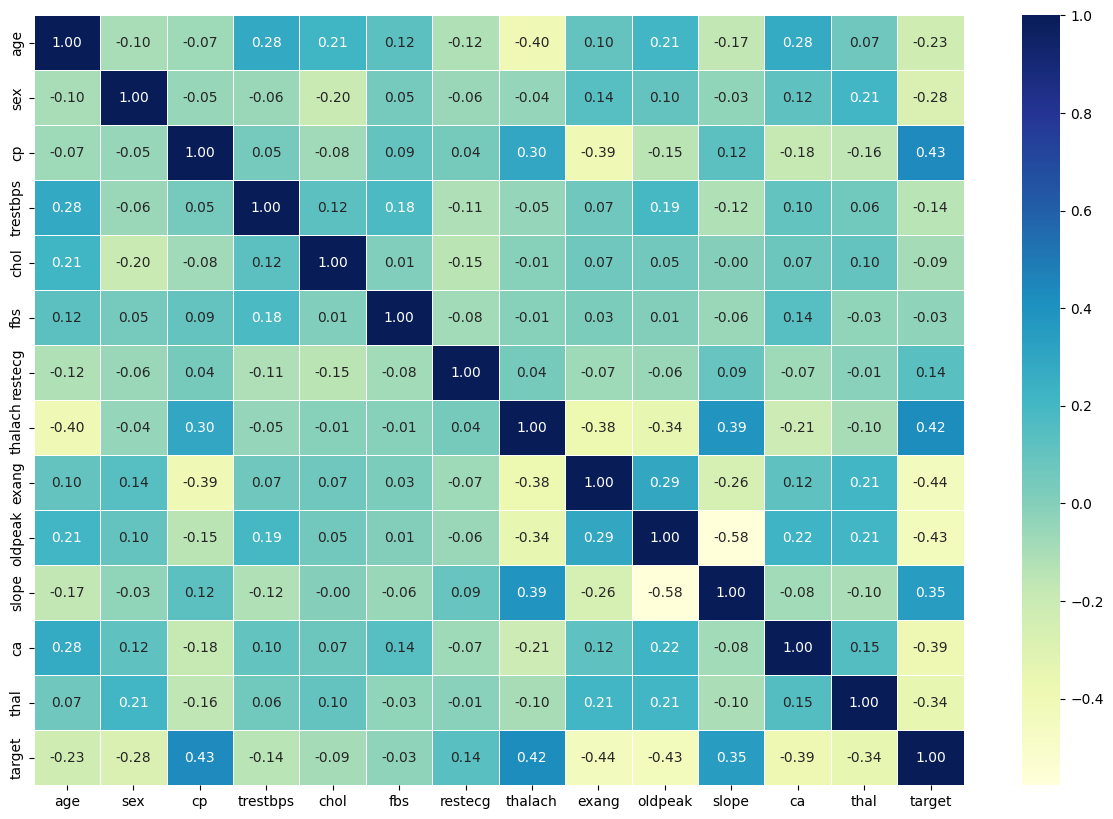

In [59]:
# Make a corealtion matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), 
            annot=True, 
            linewidths=0.5, 
            fmt = ".2f", 
            cmap="YlGnBu")   




## Modeling

In [60]:
## Splitting th values 
x = df.drop("target", axis = 1)
y = df['target']


# split in test and train data 
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2) 

Now we got our data train and test sets and nnow we have to decide a ml model.

We are going to cehck for multiple model to find the best from them.
* Logistic Regression
* K neighbors
* Random Forest 

In [61]:
# Creating a function
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Create a fucn to fit and score model 

def fit_and_score(models, x_train, x_test, y_train, y_test):
   

    # Set random seed 
    np.random.seed(42)

    # Make dict to store the model scores 
    model_score = {}

    for name , models  in models.items():
        models.fit(x_train, y_train)
        model_score[name] = models.score(x_test, y_test)

    return model_score


In [62]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Axes: >

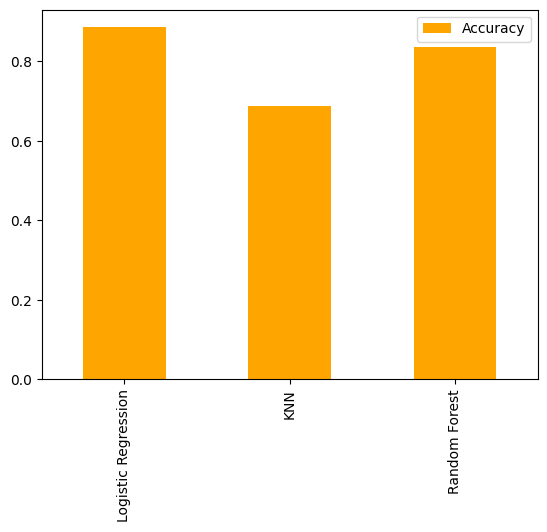

In [64]:
# Model comparison
model_compare = pd.DataFrame(model_scores, index = ["Accuracy"])
model_compare.T.plot.bar(color=['orange'])


Now we got the aseline model....and we know a models first prediction are not always what we should based our next steps off.
What should we do ?

Lets look for the following --

* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross Validiation
* Precsision
* Recall 
* F1 Score
* Classification report 
* ROC Curve
* Area under ROC Curve (AUC)


### Hyper Param Tuning

In [65]:
# Best train the KNN

train_score = []
test_score = []

# Cteate a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN
knn = KNeighborsClassifier()

# loop through different k_neoghbors 
for i in neighbors:
    knn.set_params(n_neighbors = i)

    knn.fit(x_train, y_train)

    train_score.append(knn.score(x_train,y_train))

    test_score.append(knn.score(x_test, y_test))
    

In [66]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data : 75.41% 


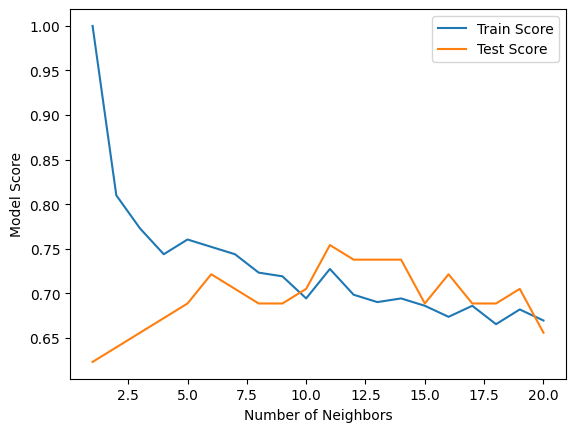

In [67]:
plt.plot(neighbors, train_score, label = "Train Score")
plt.plot(neighbors, test_score, label = "Test Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data : {max(test_score)* 100:.2f}% ")

## Hyper param tuning using the **RandomizedSearchCV**
We are going to tune `Logisctic regression model` and `Random forest Model` 


In [68]:
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# create a hyperpaam for random forest 
rd_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth"  : [None, 3,5,10],
           "min_samples_split" : np.arange(2, 20 , 2),
           "min_samples_leaf" : np.arange(1, 20, 2) 
           }

Now we have fot tune hyperparameter grod setup for each mmodel, lets tune them using `RandomizedSearchCV`

In [69]:
# Tune logistic regression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid, 
                                cv = 5, 
                                n_iter = 20,
                                verbose = True)

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [70]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [71]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we have tuned the `LogisticRegression()`....lets do the same for `RandomForestClassifier()`

In [72]:
# Setup ranodm seed
np.random.seed(42)

# Seup hyperparam
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rd_grid,
                           cv = 5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(x_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [73]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [74]:
rs_rf.score(x_test, y_test)

0.8688524590163934

## HyperParameter tuning using `GridSearchCV`

In [75]:
# Differet hyper param for logostic regression
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
                "solver" : ["liblinear"]}

# setup grid 
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 5,
                          verbose = True)

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [76]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [77]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating the tuned ML model beyond accuracy 

* ROC curve and AUC Score
* Confusion Matrix
* Classification Report 
* Precision
* Recall
* F1 Score

.... and it would be great if cross validiation  was used where possible.

To Make  comparison and evaluate our trained model, first we need to make prediction.

In [78]:
# Make prediction using tuned model 
y_preds = gs_log_reg.predict(x_test)

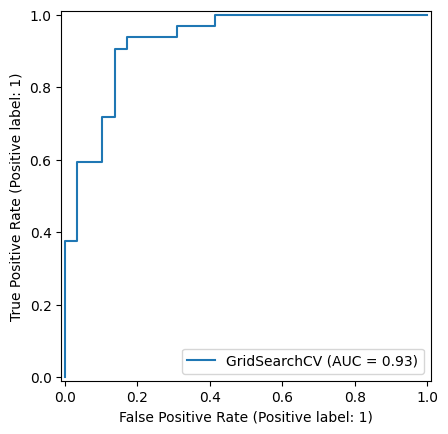

In [84]:
# Plot roc curve and calculate and calculate the AUC curve

from sklearn.metrics import RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)


In [85]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


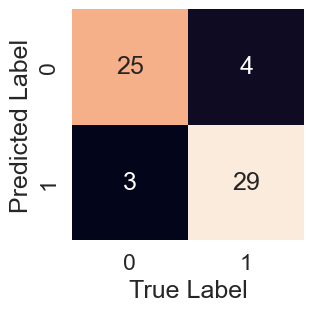

In [95]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


plot_conf_mat(y_test, y_preds)

In [97]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculaet the Evaluation  metrics using cross validiation

In [98]:
# Check best hyperparam
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [99]:
# Create a new classifer 
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [103]:
# Cross validiatedf accuracy, precision, recall and f1 score 
cv_acc = cross_val_score(clf, 
                         x,
                         y,
                         cv = 5,
                         scoring="accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [105]:
cv_precision = cross_val_score(clf, 
                         x,
                         y,
                         cv = 5,
                         scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [106]:
cv_recall = cross_val_score(clf, 
                         x,
                         y,
                         cv = 5,
                         scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [108]:
cv_f1 = cross_val_score(clf, 
                         x,
                         y,
                         cv = 5,
                         scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross Validiation Classification Metrics'}>

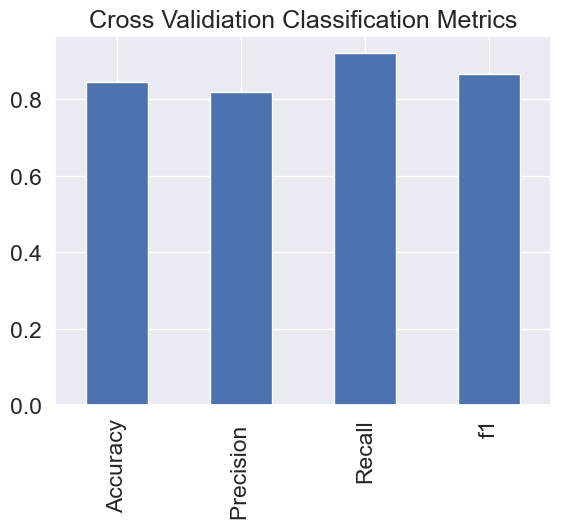

In [109]:
# Visulize cross validiation metrics
cv_metrics = pd.DataFrame({
    "Accuracy" : cv_acc,
    "Precision " : cv_precision,
    "Recall" : cv_recall,
    "f1" : cv_f1,},
    index = [0])

cv_metrics.T.plot.bar(title="Cross Validiation Classification Metrics", legend=False)